[Reference]( https://teettoo-mi.medium.com/facebook-prophet-shortcut-to-forecasting-time-series-dataset-99d4b7a60e72)

In [1]:
pip install pystan

In [2]:
pip install fbprophet

In [4]:
# Python
import pandas as pd
from fbprophet import Prophet

In [5]:
# Python
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [17]:
df.dtypes

ds     object
y     float64
dtype: object

In [19]:
df['ds'] = pd.to_datetime(df.ds)
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [20]:
df.dtypes

ds    datetime64[ns]
y            float64
dtype: object

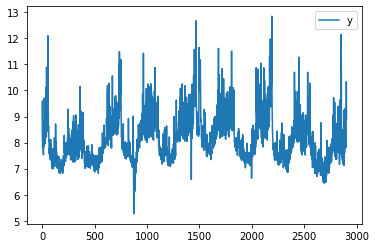

In [15]:
df.plot()

In [6]:
# Python
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [16]:
m

In [7]:
# Python
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [8]:
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.213670,7.484881,8.848008
3266,2017-01-16,8.538673,7.771910,9.269222
3267,2017-01-17,8.326104,7.645270,9.064784
3268,2017-01-18,8.158756,7.464015,8.859904
3269,2017-01-19,8.170689,7.471583,8.915373


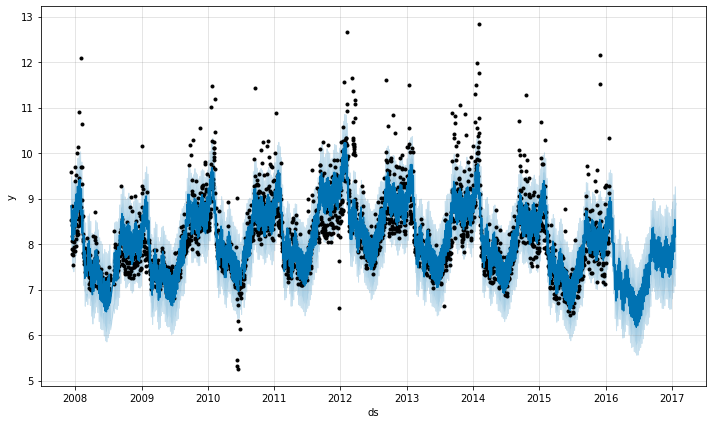

In [9]:
# Python
fig1 = m.plot(forecast)

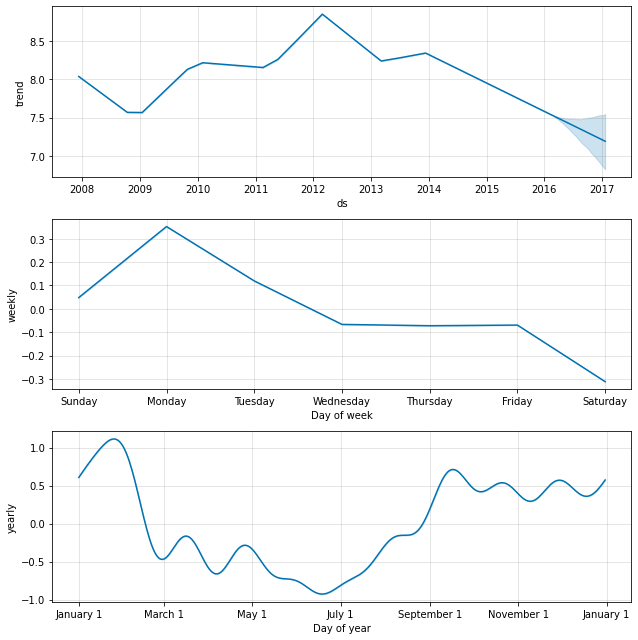

In [10]:
# Python
fig2 = m.plot_components(forecast)

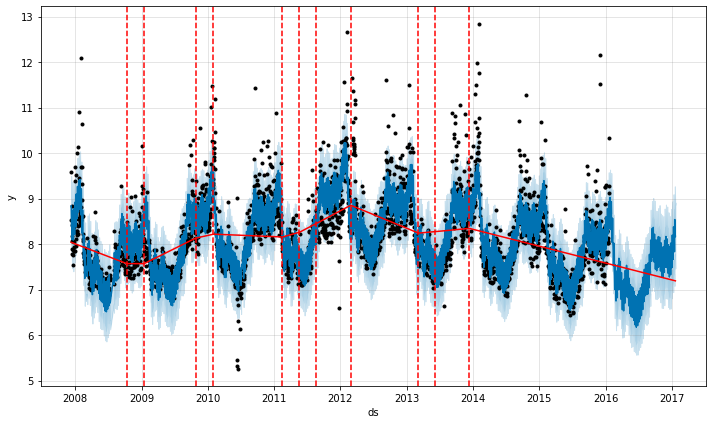

In [21]:
# Python
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [13]:
# Python
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [14]:
# Python
plot_components_plotly(m, forecast)